## Final Project Submission

Please fill out:
* Student name: MUTUA MUKARIA BONFACE
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# 1. BUSINESS UNDERSTANDING


# 2. DATA UNDERSTANDING

#### 2.1 DATA COLLECTION

This project uses data from King County House Sales. The data is provided for this project as kc_house_data.csv

#### Loading the data

In [156]:
# Import the relevant libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

data = pd.read_csv('data/kc_house_data.csv')
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


#### 2.2 DATA DESCRIPTION

|Column|        |Description|
|------|        |-----------|
|id|            |Unique identifier for a house| 
|date|          |Date house was sold|
|price|         |Sale price (prediction target)|
|bedrooms|      |Number of bedrooms|
|bathrooms|     |Number of bathrooms|
|sqft_living|   |Square footage of living space in the home|
|sqft_lot|      |Square footage of the lot|
|floors|        |Number of floors (levels) in house|
|waterfront|    |Whether the house is on a waterfront|
|view|          |Quality of view from house|
|condition|     |How good the overall condition of the house is. Related to maintenance of house|
|grade|         |Overall grade of the house. Related to the construction and design of the house|
|sqft_above|    |Square footage of house apart from basement|
|sqft_basement| |Square footage of the basement|
|yr_built|      |Year when house was built|
|yr_renovated|  |Year when house was renovated|
|zipcode|       |ZIP Code used by the United States Postal Service|
|lat|           |Latitude coordinate|
|long|          |Longitude coordinate|
|sqft_living15| |The square footage of interior housing living space for the nearest 15 neighbors|
|sqft_lot15|    |The square footage of the land lots of the nearest 15 neighbors|

#### 2.3 SAMPLING STRATEGY

#### 2.3.1. TARGET POPULATION 

The target population for this project are the people living within the King County. The dataset contains more than sufficient information on whatever any house client would look into while purchasing or renting a house within this county. 

#### 2.3.2. SAMPLING METHOD 

As noted earlier on, this project uses data from King County House Sales. However, it contains several columns some of which are irrelevant in drawing the project's deductions. Thus, not all these columns are useable. The columns useable in this case trickle down to the data scientist's view on what is vitaly essential for home searchers in their quest of deciding in which house to settle on for residing purposes. 

#### 2.3.3. SAMPLE FRAME AND SIZE

Regarding the above statement, several columns in this dataset will be vital in making significant deductions from this project. The price which is the dependent variale in this case leads the line along with several others including, bedrooms, bathrooms, sqft-living, sqft-lot, waterfront, condition, grade, yr_built that are all possible independent variables of this project.

However, there is no certainity whether these all columns will be incusive in our model as some of them maybe subject to dropping at the data cleaning stage of the project.


#### 2.4 DESCRIBING THE QUESTION 

#### 2.4.1. SPECIFYING THE QUESTION 

#### 2.4.2. DEFINING THE METRIC FOR SUCCESS

#### 2.5 HYPOTHESIS TESTING PROCEDURE

#### 2.4.3. EXPERIMENTAL DESIGN 

# 3. DATA PREPARATION 

#### 3.1. SELECTING DATA

We will use the columns with no null values from the chosen columns, price, bedrooms, bathrooms, sqft-living, sqft-lot, waterfront, condition, grade, yr_built. These data sets will be recognized as df for this case. 

#### 3.2. DATA CLEANING 

In [157]:
# loading the relevant dataset
df = data[['price' , 'bedrooms' , 'bathrooms' , 'sqft_living' , 'sqft_lot' , 'waterfront' , 'condition' , 'grade' , 'yr_built']]
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,condition,grade,yr_built
0,221900.0,3,1.00,1180,5650,NaN,Average,7 Average,1955
1,538000.0,3,2.25,2570,7242,NO,Average,7 Average,1951
2,180000.0,2,1.00,770,10000,NO,Average,6 Low Average,1933
3,604000.0,4,3.00,1960,5000,NO,Very Good,7 Average,1965
4,510000.0,3,2.00,1680,8080,NO,Average,8 Good,1987


In [158]:
# checking for missing values 
df.isnull()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,condition,grade,yr_built
0,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
21592,False,False,False,False,False,False,False,False,False
21593,False,False,False,False,False,False,False,False,False
21594,False,False,False,False,False,False,False,False,False
21595,False,False,False,False,False,True,False,False,False


There are missing values in the chosen dataset. So we further explore to check which column contain null values. 

In [159]:
# checking which column contains missing values
df.isnull().any()

price          False
bedrooms       False
bathrooms      False
sqft_living    False
sqft_lot       False
waterfront      True
condition      False
grade          False
yr_built       False
dtype: bool

In [160]:
# Checking the number of missing values in the said waterfront column above.
df.isna().sum()

price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
waterfront     2376
condition         0
grade             0
yr_built          0
dtype: int64

The waterfront column is the only column with missing values in this chosen dataset. It is a vital column in this dataset since it is one of the columns with categorical values that must be included in the project. However, there are two more remaining categorical columns in condition and grade. Furthermore, not all houses within this county will be on a waterfront thus rendering the column less vital. Again, the column has quite a huge number of data missing(2376). Thus the column is worth dropping. 


In [161]:
# dropping off the waterfront column 
cleandf = df.drop(['waterfront'], axis = 1)
cleandf

,price,bedrooms,bathrooms,sqft_living,sqft_lot,condition,grade,yr_built
0,221900.0,3,1.00,1180,5650,Average,7 Average,1955
1,538000.0,3,2.25,2570,7242,Average,7 Average,1951
2,180000.0,2,1.00,770,10000,Average,6 Low Average,1933
3,604000.0,4,3.00,1960,5000,Very Good,7 Average,1965
4,510000.0,3,2.00,1680,8080,Average,8 Good,1987
...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,Average,8 Good,2009
21593,400000.0,4,2.50,2310,5813,Average,8 Good,2014
21594,402101.0,2,0.75,1020,1350,Average,7 Average,2009
21595,400000.0,3,2.50,1600,2388,Average,8 Good,2004


Dropping this column ensures, validity, uniformity, consistency, and accuracy of the project's results. From here, cleandf remains the dataframe to be used. 

# 4. DATA ANALYSIS

#### 4.1 EXPLORATORY DATA ANALYSIS 

In [162]:
# checking the overall correlation of price with all independent variables
cleandf.corr()['price']

price          1.000000
bedrooms       0.308787
bathrooms      0.525906
sqft_living    0.701917
sqft_lot       0.089876
yr_built       0.053953
Name: price, dtype: float64

This part will contain the linear regression part and model of this project. As stated earlier, the price is the dependent variabe in this project while all others are independent variables. Out of the list of independent variables, this section uses the sqft_living of a house to check its dictation on the price of a house. It is one of the most positively correlated with the price. 

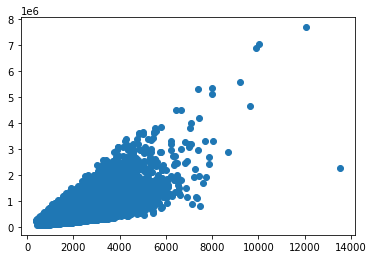

In [163]:
# checking correlation between the independent and dependent variables
y_linear = cleandf['price']
X_linear = cleandf['sqft_living']
plt.scatter(X_linear, y_linear)

The graph above shows a positive correlation between the price of a house and sqft_living. From here, the project goes further to explore the extent of the dictation. 

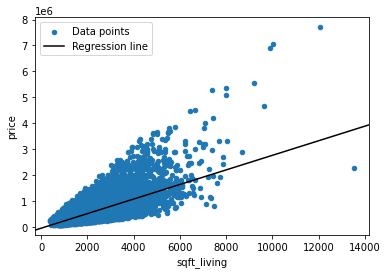

In [164]:
# Regression line
x = X_linear
y = y_linear
fig, ax = plt.subplots()
cleandf.plot.scatter(x = 'sqft_living' , y = 'price' , label = 'Data points' , ax = ax)
sm.graphics.abline_plot(model_results = linear_results, label = 'Regression line', ax = ax , color = 'black')
ax.legend();

In [165]:
# Linear regression model formulation 
linear_model = sm.OLS(y_linear, sm.add_constant(X_linear))
# fitting the model
linear_results = linear_model.fit()

In [166]:
# Linear_model results summary
print(linear_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Wed, 28 Sep 2022   Prob (F-statistic):               0.00
Time:                        09:02:47   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.399e+04   4410.023     -9.975      

#### Model Interpretations 

From the table above, y = 280.8630sqft_living - 43990

This model is statistically significant in that the F-statistic is below the threshold p_value 0.005. Thus, we fail to reject the null hypothesis which in this case is by default 'the two variables are not dependent on each other' and conclude that the two variables are dependent on each other. 

The model explains about 49% of the variance in the price of houses. 

For a house with zero sqft_living, there would be a drop in its price by $43990.

An increase in sqft_living by 1 unit would result to an alternative increase in the price of the house by $280

#### Categorical data 

In [167]:
# Finding out data types for this set
cleandf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21597 non-null  float64
 1   bedrooms     21597 non-null  int64  
 2   bathrooms    21597 non-null  float64
 3   sqft_living  21597 non-null  int64  
 4   sqft_lot     21597 non-null  int64  
 5   condition    21597 non-null  object 
 6   grade        21597 non-null  object 
 7   yr_built     21597 non-null  int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 1.3+ MB


There is a revelation that condition and grade are the available categorical columns in this dataset.

In [168]:
# using pandas to one-hot encode on the entire dataframes that seem categorical 
pd.get_dummies(cleandf, columns = ['condition' , 'grade'])

,price,bedrooms,bathrooms,sqft_living,sqft_lot,yr_built,condition_Average,condition_Fair,condition_Good,condition_Poor,...,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,221900.0,3,1.00,1180,5650,1955,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,538000.0,3,2.25,2570,7242,1951,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,180000.0,2,1.00,770,10000,1933,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,604000.0,4,3.00,1960,5000,1965,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,510000.0,3,2.00,1680,8080,1987,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,2009,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
21593,400000.0,4,2.50,2310,5813,2014,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
21594,402101.0,2,0.75,1020,1350,2009,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
21595,400000.0,3,2.50,1600,2388,2004,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [169]:
cleandf['condition'].value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

<AxesSubplot:xlabel='condition'>

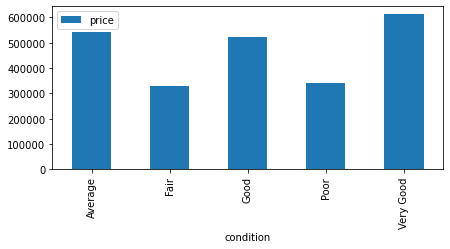

In [170]:
fig, ax = plt.subplots(figsize = (7 , 3))
cleandf.groupby('condition').mean().plot.bar(y = 'price' , ax =ax)

As the names suggest, average implies that the house is in an average condition, good implies it is in a good condition, very good implies it is in a very good condition, fair implies it is in a fair condition, while poor implies it is in a poor condition. 

In [171]:
cleandf['grade'].value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

<AxesSubplot:xlabel='grade'>

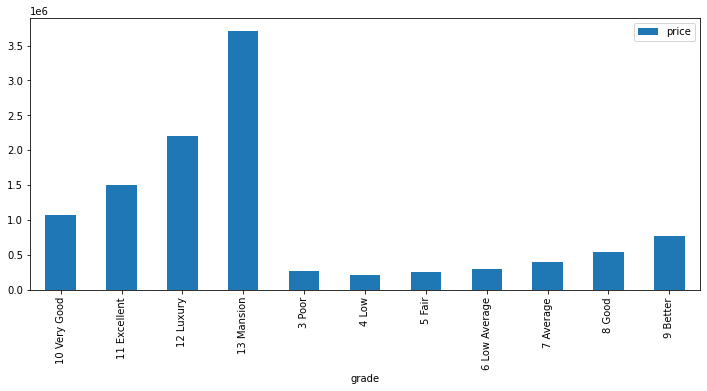

In [172]:
fig, ax = plt.subplots(figsize = (12, 5))
cleandf.groupby('grade').mean().plot.bar(y = 'price' , ax =ax)

Just like for condition above, the names very good, excellent, mansion, poor, low, fair, low average, good, and better all imply the grades as per rating of the house consitions. 

In [173]:
encoded_df = cleandf[['condition']].copy()
encoded_df.sample(12, random_state = 1)

,condition
16729,Average
10996,Average
12089,Average
554,Very Good
16075,Very Good
17962,Good
13,Good
4960,Average
16928,Poor
3780,Average


In [174]:
encoded_df['condition_average'] = encoded_df['condition'] == 'Average'
encoded_df.sample(12, random_state = 1)

,condition,condition_average
16729,Average,True
10996,Average,True
12089,Average,True
554,Very Good,False
16075,Very Good,False
17962,Good,False
13,Good,False
4960,Average,True
16928,Poor,False
3780,Average,True


In [184]:
encoded_df['condition_average'] = (encoded_df['condition'] == 'Average').apply(int)
encoded_df['condition_good'] = (encoded_df['condition'] == 'Good').apply(int)
encoded_df['condition_very good'] = (encoded_df['condition'] == 'Very Good').apply(int)
encoded_df['condition_fair'] = (encoded_df['condition'] == 'Fair').apply(int)
encoded_df['condition_poor'] = (encoded_df['condition'] == 'Poor').apply(int)

encoded_df.sample(12, random_state = 1)
# encoded_df = pd.get_dummies(encoded_df, columns = ['condition'])
# encoded_df

KeyError: 'condition'

In [144]:
# we first one-hot encode condition 
# encoded_y = cleandf['price']
# encoded_X = cleandf[['bedrooms', 'bathrooms' , 'sqft_living' , 'sqft_lot' , 'condition' , 'grade' , 'yr_built']]
# encoded_X

,bedrooms,bathrooms,sqft_living,sqft_lot,condition,grade,yr_built
0,3,1.00,1180,5650,Average,7 Average,1955
1,3,2.25,2570,7242,Average,7 Average,1951
2,2,1.00,770,10000,Average,6 Low Average,1933
3,4,3.00,1960,5000,Very Good,7 Average,1965
4,3,2.00,1680,8080,Average,8 Good,1987
...,...,...,...,...,...,...,...
21592,3,2.50,1530,1131,Average,8 Good,2009
21593,4,2.50,2310,5813,Average,8 Good,2014
21594,2,0.75,1020,1350,Average,7 Average,2009
21595,3,2.50,1600,2388,Average,8 Good,2004


#### 4.1.1. UNIVARIATE DATA ANALYSIS

#### 4.1.2. BIVARIATE DATA ANALYSIS 